<a href="https://colab.research.google.com/github/JoaoRudolf/BigDataClientes/blob/main/Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=1ba4c0fc6eb8e65da5c872d852f6dd038ea72acffe98ae61a60f0b85bd024a05
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [3]:
import pyspark

In [4]:
from pyspark.sql import SparkSession

In [7]:
spark = SparkSession.builder.appName("clientes").getOrCreate()

In [8]:
df = spark.read.csv("clientes.csv", header=True, inferSchema=True)

In [9]:
df.show(2)

+-----------------+----------------+-----------------+--------------------+--------------+-----------------------+--------------+-----+--------------+
|DiasProjetoPronto|AmbientesOrçados|AmbientesFechados|PressaOrçamento(1=s)|Indicação(1=s)|Casa 0 ou Apartamento 1|Renda Familiar|Idade|Valor da Venda|
+-----------------+----------------+-----------------+--------------------+--------------+-----------------------+--------------+-----+--------------+
|                5|               2|                0|                   0|             0|                      1|           8.0|   50|             0|
|                5|               1|                0|                   1|             0|                      1|          4.25|   31|             0|
+-----------------+----------------+-----------------+--------------------+--------------+-----------------------+--------------+-----+--------------+
only showing top 2 rows



In [10]:
df.describe().toPandas()

,summary,DiasProjetoPronto,AmbientesOrçados,AmbientesFechados,PressaOrçamento(1=s),Indicação(1=s),Casa 0 ou Apartamento 1,Renda Familiar,Idade,Valor da Venda
0,count,60,60,60,60,60,60,60,60,60
1,mean,4.733333333333333,2.25,0.5166666666666667,0.23333333333333334,0.2,0.6333333333333333,9.956666666666669,36.3,2469.0833333333335
2,stddev,0.9363953001762079,1.144256105029947,0.9476405430700277,0.4265218680850987,0.40337558727168876,0.4859611014169709,5.102047334712774,10.661669026971245,5695.376767024424
3,min,2,1,0,0,0,0,1.8,21,0
4,max,7,5,4,1,1,1,25.0,58,34000


In [11]:
df.groupby('Valor da Venda').count().toPandas()

,Valor da Venda,count
0,6500,1
1,5100,1
2,8500,1
3,1350,1
4,14345,1
5,3500,1
6,34000,1
7,1250,1
8,3800,1
9,1000,1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

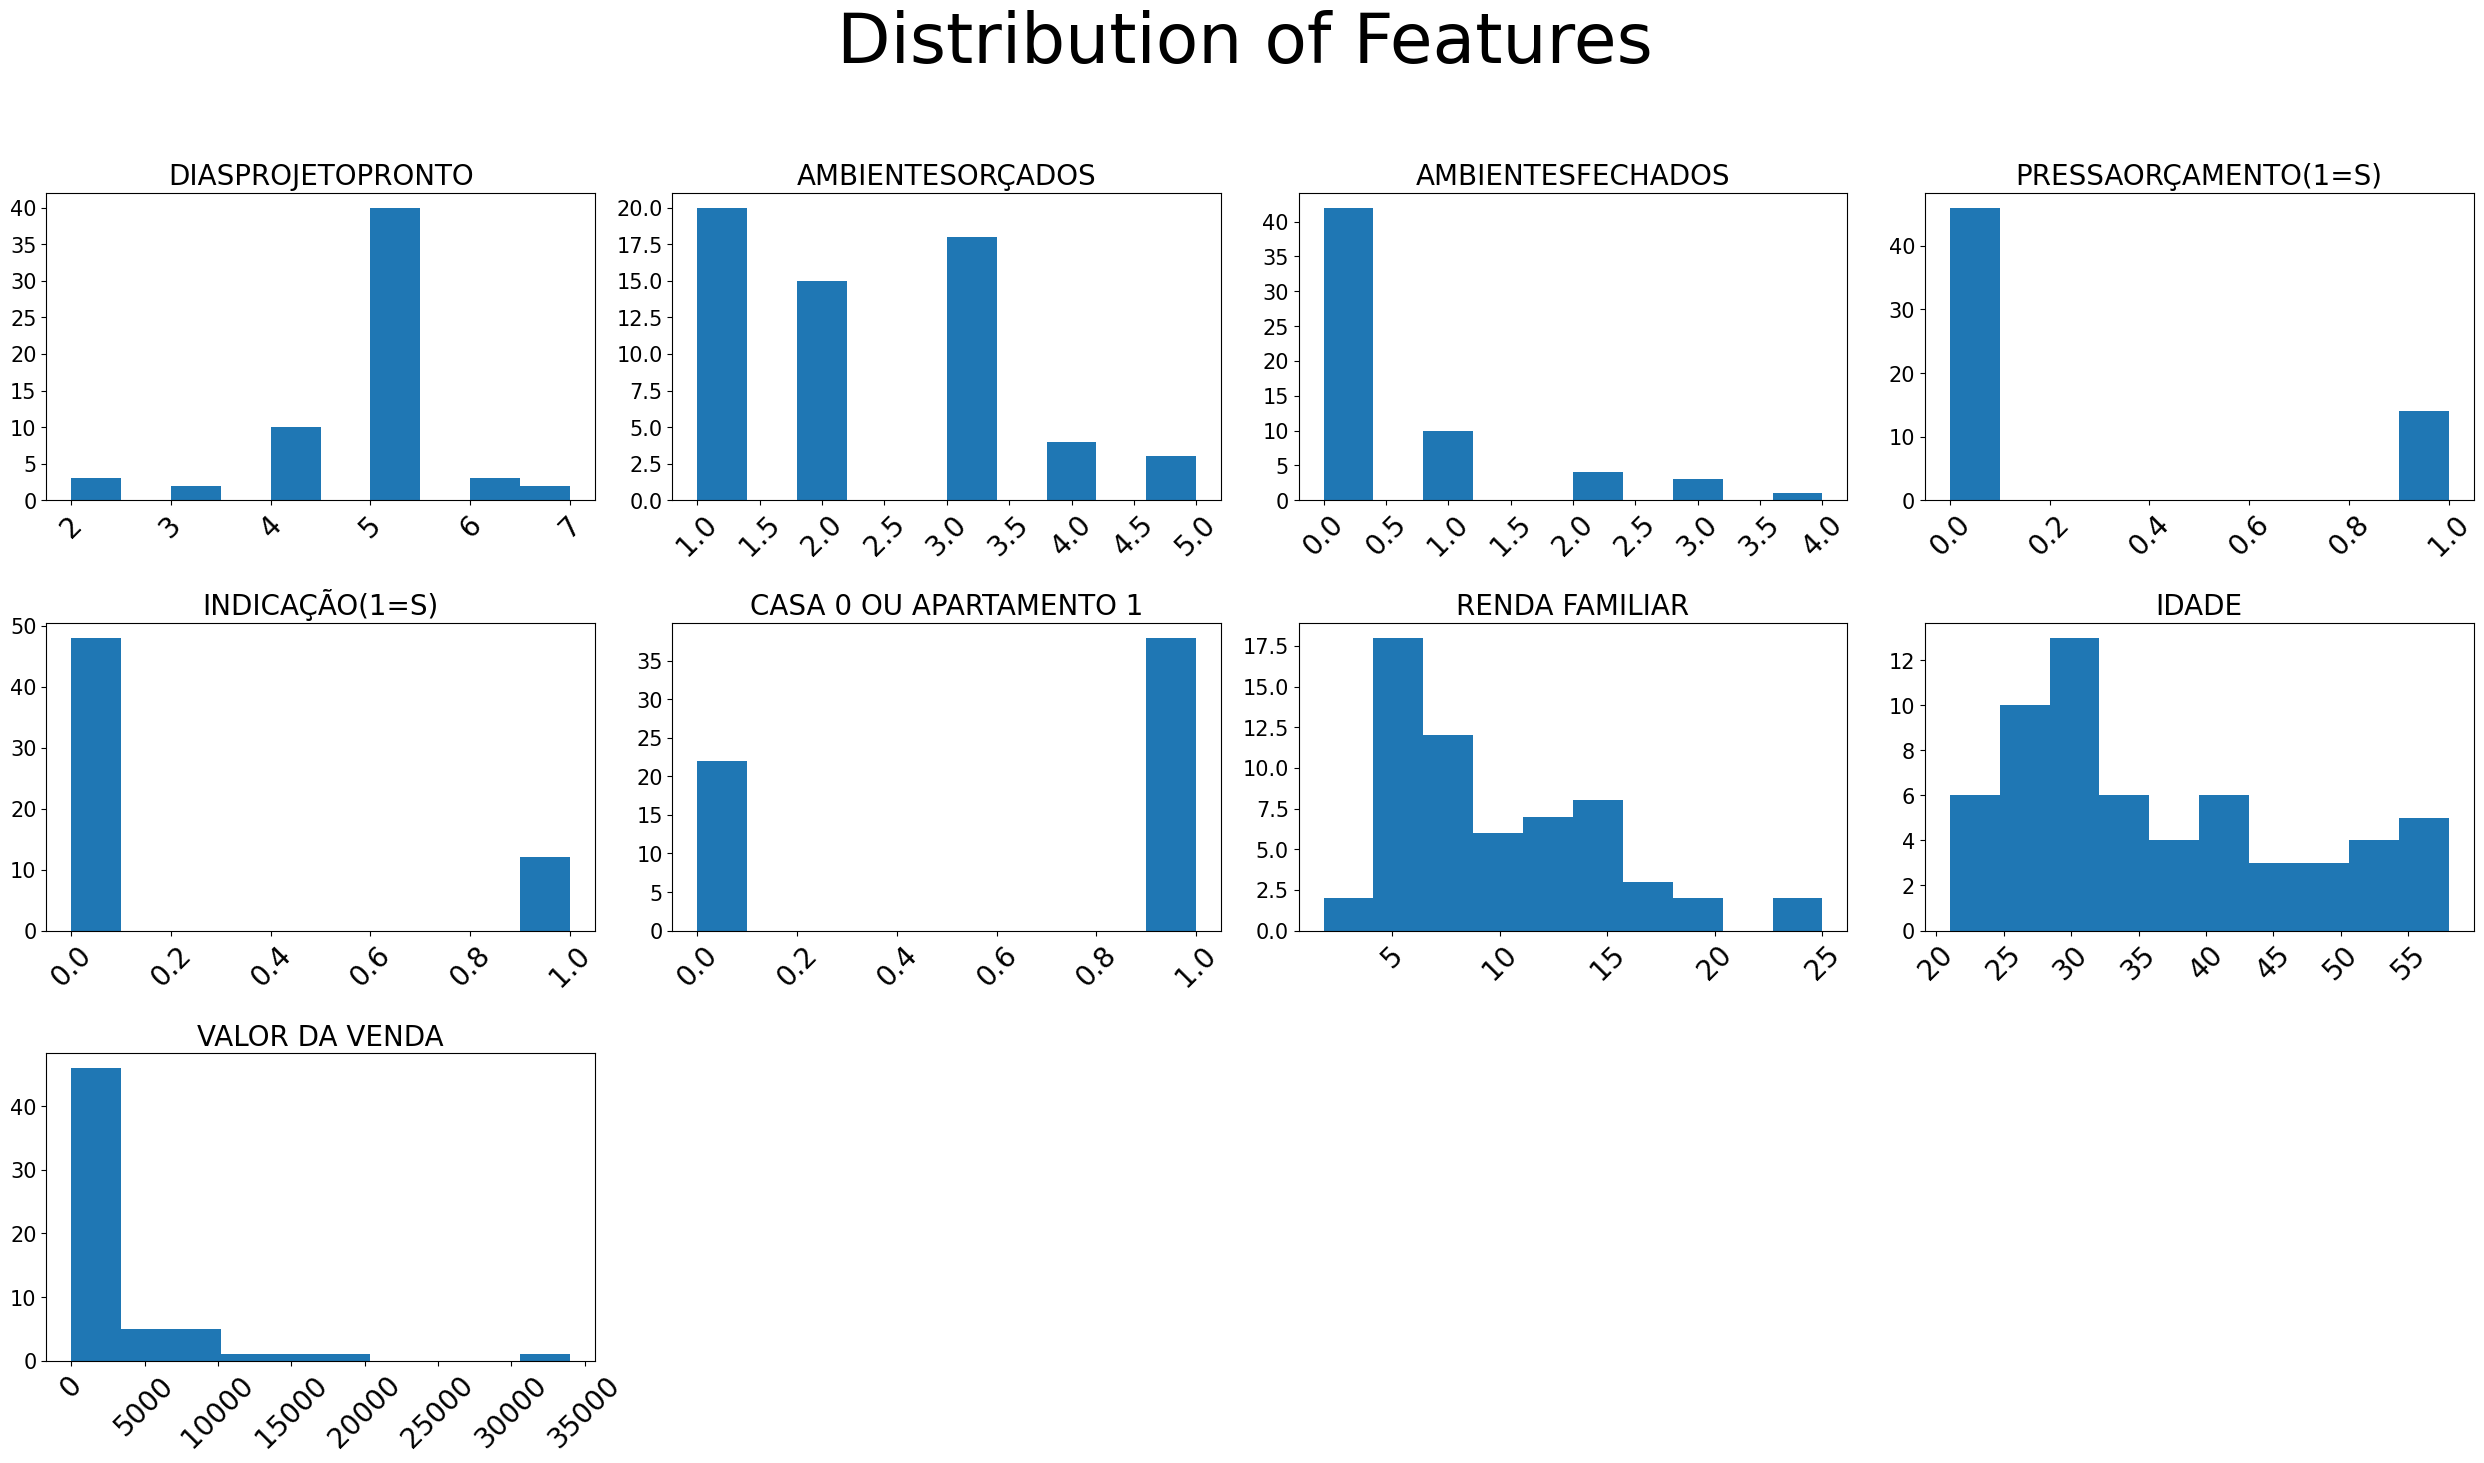

In [13]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(df.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(3,4, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

In [16]:
numeric_features = [t[0] for t in df.dtypes if t[1] !='string']
numeric_features_df = df.select(numeric_features)
numeric_features_df.toPandas().head()

,DiasProjetoPronto,AmbientesOrçados,AmbientesFechados,PressaOrçamento(1=s),Indicação(1=s),Casa 0 ou Apartamento 1,Renda Familiar,Idade,Valor da Venda
0,5,2,0,0,0,1,8.00,50,0
1,5,1,0,1,0,1,4.25,31,0
2,4,4,4,0,1,0,6.40,32,8600
3,2,3,3,0,1,0,7.10,27,3500
4,5,2,0,0,0,1,11.00,33,0


In [17]:
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])

In [14]:
from pyspark.mllib.stat import Statistics
import pandas as pd

In [18]:
corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
round(corr_df, 2)

,DiasProjetoPronto,AmbientesOrçados,AmbientesFechados,PressaOrçamento(1=s),Indicação(1=s),Casa 0 ou Apartamento 1,Renda Familiar,Idade,Valor da Venda
DiasProjetoPronto,1.00,-0.05,-0.22,0.20,-0.17,0.30,-0.08,0.08,-0.02
AmbientesOrçados,-0.05,1.00,0.52,-0.19,0.48,0.23,0.15,0.01,0.54
AmbientesFechados,-0.22,0.52,1.00,-0.26,0.70,0.05,0.22,-0.07,0.78
PressaOrçamento(1=s),0.20,-0.19,-0.26,1.00,-0.18,0.01,-0.00,-0.15,-0.18
Indicação(1=s),-0.17,0.48,0.70,-0.18,1.00,0.12,0.15,0.03,0.62
Casa 0 ou Apartamento 1,0.30,0.23,0.05,0.01,0.12,1.00,-0.01,-0.03,0.19
Renda Familiar,-0.08,0.15,0.22,-0.00,0.15,-0.01,1.00,0.17,0.45
Idade,0.08,0.01,-0.07,-0.15,0.03,-0.03,0.17,1.00,-0.05
Valor da Venda,-0.02,0.54,0.78,-0.18,0.62,0.19,0.45,-0.05,1.00


from matplotlib import pyplot as plt
_df_0['DiasProjetoPronto'].plot(kind='hist', bins=20, title='DiasProjetoPronto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AmbientesOrçados'].plot(kind='hist', bins=20, title='AmbientesOrçados')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AmbientesFechados'].plot(kind='hist', bins=20, title='AmbientesFechados')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PressaOrçamento(1=s)'].plot(kind='hist', bins=20, title='PressaOrçamento(1=s)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='DiasProjetoPronto', y='AmbientesOrçados', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='AmbientesOrçados', y='AmbientesFechados', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AmbientesFechados', y='PressaOrçamento(1=s)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PressaOrçamento(1=s)', y='Indicação(1=s)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['DiasProjetoPronto'].plot(kind='line', figsize=(8, 4), title='DiasProjetoPronto')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['AmbientesOrçados'].plot(kind='line', figsize=(8, 4), title='AmbientesOrçados')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AmbientesFechados'].plot(kind='line', figsize=(8, 4), title='AmbientesFechados')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PressaOrçamento(1=s)'].plot(kind='line', figsize=(8, 4), title='PressaOrçamento(1=s)')
plt.gca().spines[['top', 'right']].set_visible(False)

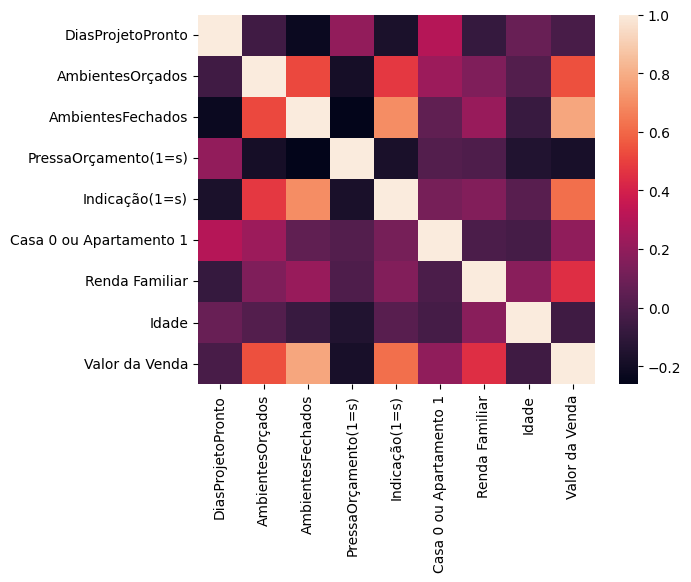

In [19]:
sns.heatmap(corr_df);